In [325]:
import pandas as pd
import numpy as np

In [326]:
df = pd.read_csv('playstore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### __Data Clean Up - Missing Value Treatment__

In [327]:
df.shape # here we check total number of rows and columns in data. i.e. 10841 rows and 13 columns

(10841, 13)

In [328]:
df.info() # Here we check count, null status and data type of the data in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


### a. Drop records where rating is missing since rating is our target/study variable 

In [329]:
df['Rating'].isnull().sum()  # Here we check total number of null  values in "Rating" column

1474

In [330]:
df = df.dropna(subset=['Rating'])
# Here we drop or delete all the rows which has null values in this column as we saw there are total of 1474 null values.

In [331]:
df.isnull().sum() # Here we see that all the null value records are deleted from "Rating" column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column

In [332]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### i. Are all 3 records having the same problem? 

__NO. only 3rd record with index 10472 has wrong values many columns__

In [333]:
df['Android Ver'].isnull().sum() # Here we see that there are total of 3 missing or null value which are nan.

3

In [334]:
df.info() # this show that we have to either

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [335]:
df[df['App'].str.match('Life Made')] # Here we searched for the string provided to delete that record

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [336]:
i = df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'
print(i.sum()) 
# This is Optional code to check total number of records with this string.

1


#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [337]:
df[df['App'].str.match('Life Made')].index  # Here we find the index of that code to delete that row from the dataset

Int64Index([10472], dtype='int64')

In [338]:
df.drop([10472], inplace=True) 
# Here drop/delete the row by specifying the index and also save this change in dataset using 'inpace=true'

In [339]:
df[df['App'].str.match('Life Made')] # we again run this code to see if its deleted or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [340]:
df['Android Ver'].isnull().sum() 
# we check that 3rd null record is deleted or not. Previously it was 3 and now its 2. so its its dleted.

2

### iii. Replace remaining missing values with the mode

In [341]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True) # Here we filled null/nan values with mode

In [342]:
df.info() # Here we can see that 'Android Ver' has 9366 records, whih was 9364 previously

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [343]:
df['Android Ver'].shape # This code can also be used to check the records. This is also optional code

(9366,)

In [344]:
df['Android Ver'].isnull().sum() # Again optional code to see if null values filled or not.

0

### c. Current ver – replace with most common value

In [345]:
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [346]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True) 
# Here we filled null/nan values with mode i.e most frequent or most common

In [347]:
df.info() # so Current Ver column is also filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [348]:
df.isnull().sum() # here we see that no column has null/nan values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [349]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

 __From the above observation we can see that we need to bring "Reviews", "installs" "Price" to numeric types__

### b. Price variable – remove $ sign and convert to float

In [350]:
df['Price'].unique() 
# lets check unique values to find some insights as sample values cannot always show the preview of whole data set
# we used this code as we were not able to see values with $ using df.head()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [351]:
df['Price'] = df.Price.apply(lambda x: x.strip('$')) # Here we remove $ sign

In [352]:
df['Price'].sample(10) # Again run the code to see that $ sign is removed or not

3613     0
838      0
4006     0
2083     0
1780     0
3460     0
3824     0
4311     0
10261    0
1937     0
Name: Price, dtype: object

In [353]:
df['Price'] = df['Price'].astype(float)

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [354]:
df['Installs'].unique() # again check the unique values

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [355]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+')) # this removes + from all records in this column

In [356]:
df['Installs'].sample(10) # again check if + is removed or not

2763     100,000,000
354       10,000,000
1847      50,000,000
2106      10,000,000
1910     100,000,000
2488       1,000,000
3202      50,000,000
992       10,000,000
10577         10,000
1111          50,000
Name: Installs, dtype: object

In [357]:
df['Installs'] = df['Installs'].str.replace(',', '') # this code is to remove ',' 

In [358]:
df['Installs'].sample(10)  # check if ',' is removed

9600     1000000
9116        5000
1622      500000
8754    10000000
9818     5000000
4194      500000
8907      500000
5039       10000
3120     5000000
9582      100000
Name: Installs, dtype: object

In [359]:
df['Installs'] = df['Installs'].astype(int)

### d. Convert all other identified columns to numeric

In [360]:
df['Reviews'] = df['Reviews'].astype(float)
#df['Price'] = df['Price'].astype(float)
#df['Installs'] = df['Installs'].astype(int)

In [361]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

#### i. Are there any such records? Drop if so

In [362]:
df['Rating'].unique() # check all the unique ratings so we get an idea of it

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [363]:
df['Rating'].describe() # this is better idea to check rating between 1 and 5 than upper code. check min and max values

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

__No such records. So, no need to drop.__

### b. Reviews should not be more than installs as only those who installed can review the app.

#### i. Are there any such records? Drop if so.

In [364]:
(df['Reviews'] > df['Installs']).sum()

7

In [365]:
df.drop(df[(df['Reviews'] > df['Installs'])].index, axis=0, inplace=True)

In [366]:
(df['Reviews'] > df['Installs']).sum()

0

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9359 non-null   object 
 1   Category        9359 non-null   object 
 2   Rating          9359 non-null   float64
 3   Reviews         9359 non-null   float64
 4   Size            9359 non-null   float64
 5   Installs        9359 non-null   int32  
 6   Type            9359 non-null   object 
 7   Price           9359 non-null   float64
 8   Content Rating  9359 non-null   object 
 9   Genres          9359 non-null   object 
 10  Last Updated    9359 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9359 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 987.1+ KB


### 4. Identify and handle outliers –

### a. Price column

#### i. Make suitable plot to identify outliers in price

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x29967c18710>,
 'caps': [<matplotlib.lines.Line2D at 0x29967c18048>,
 'boxes': [<matplotlib.lines.Line2D at 0x29967c18b00>],
 'medians': [<matplotlib.lines.Line2D at 0x299669ec940>],
 'fliers': [<matplotlib.lines.Line2D at 0x299669ec5f8>],
 'means': []}

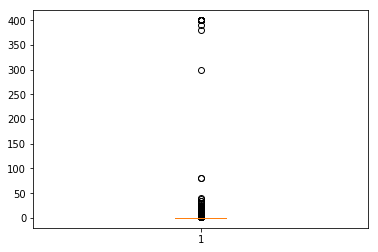

In [369]:
plt.boxplot(df['Price'])

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

__No, I don't expect apps on the play stroe to cost $200. This is very huge amount to pay for apps on play store and is less likely to be bought by people.__

#### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [370]:
df.drop(df[df['Price'] > 200].index, inplace = True) # here we extract apps wich cost less than $200

In [371]:
df['Price'].unique() #checking for all values and ensuring everything is right

array([ 0.  ,  4.99,  3.99,  6.99,  7.99,  5.99,  2.99,  3.49,  1.99,
        9.99,  7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 79.99,
       16.99, 14.99, 29.99, 12.99,  2.49, 10.99,  1.5 , 19.99, 15.99,
       33.99, 39.99,  3.95,  4.49,  1.7 ,  8.99,  1.49,  3.88, 17.99,
        3.02,  1.76,  4.84,  4.77,  1.61,  2.5 ,  1.59,  6.49,  1.29,
       37.99, 18.99,  8.49,  1.75, 14.  ,  2.  ,  3.08,  2.59, 19.4 ,
        3.9 ,  4.59, 15.46,  3.04, 13.99,  4.29,  3.28,  4.6 ,  1.  ,
        2.95,  2.9 ,  1.97,  2.56,  1.2 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x2996695eef0>,
 'caps': [<matplotlib.lines.Line2D at 0x299669555c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2996695eb00>],
 'medians': [<matplotlib.lines.Line2D at 0x29966955c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x29966955f98>],
 'means': []}

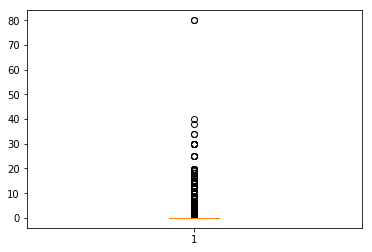

In [372]:
plt.boxplot(df['Price']) # plotting to find more outliers

#### iv. Limit data to records with price < $30

In [373]:
df.drop(df[df['Price'] > 30].index, inplace = True)    #here we extract apps wich cost less than $30

In [374]:
df['Price'].unique() #checking for all values and ensuring everything is right

array([ 0.  ,  4.99,  3.99,  6.99,  7.99,  5.99,  2.99,  3.49,  1.99,
        9.99,  7.49,  0.99,  9.  ,  5.49, 10.  , 24.99, 11.99, 16.99,
       14.99, 29.99, 12.99,  2.49, 10.99,  1.5 , 19.99, 15.99,  3.95,
        4.49,  1.7 ,  8.99,  1.49,  3.88, 17.99,  3.02,  1.76,  4.84,
        4.77,  1.61,  2.5 ,  1.59,  6.49,  1.29, 18.99,  8.49,  1.75,
       14.  ,  2.  ,  3.08,  2.59, 19.4 ,  3.9 ,  4.59, 15.46,  3.04,
       13.99,  4.29,  3.28,  4.6 ,  1.  ,  2.95,  2.9 ,  1.97,  2.56,
        1.2 ])

### b. Reviews column

#### i. Make suitable plot

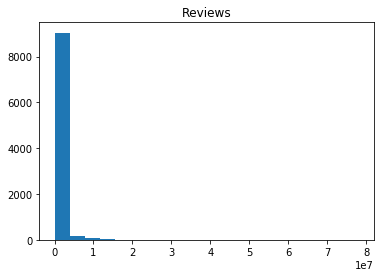

In [375]:
x = df['Reviews']
plt.hist(x, bins=20)
plt.title('Reviews')
plt.show()
# here we plot histogram for seeing the distribution of the data

### ii. Limit data to apps with < 1 Million reviews

In [376]:
df.drop(df[df['Reviews'] > 1000000].index, inplace = True)    #here we extract apps wich cost less than $30

In [377]:
df["Reviews"].unique() # check just for surety

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

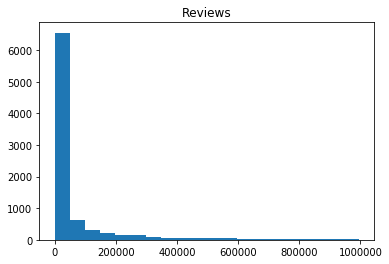

In [378]:
x = df['Reviews']
plt.hist(x, bins=20)
plt.title('Reviews')
plt.show()
# plotting histogram after applying condition
#we can see it is much better now than previous plot without applying condition

### c. Installs

#### i. What is the 95th percentile of the installs?

In [379]:
x = df['Installs']
np.quantile(x, 0.95) # we find that 95th percentile is 1000000000.0 and 95% of the data lies below this value.


10000000.0

#### ii. Drop records having a value more than the 95th percentile

In [380]:
df.drop(df[df['Installs'] > np.quantile(x, 0.95)].index, inplace = True) #dropping records with value more than 1000000000.0(95th percentile)

In [381]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4536,Offroad Pickup Truck R,FAMILY,4.4,6367.0,96000.000000,1000000,Free,0.0,Everyone,Simulation,"July 14, 2017",1.4,2.3 and up
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661.0,4000.000000,1000000,Free,0.0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
7449,Sin City Hero : Crime Simulator of Vegas,GAME,4.1,3371.0,78000.000000,100000,Free,0.0,Teen,Action,"September 8, 2017",1.1,4.0.3 and up
8838,DS-20000S,PRODUCTIVITY,1.8,12.0,14000.000000,1000,Free,0.0,Everyone,Productivity,"August 3, 2018",1.2.2,4.1 and up
3838,"Yanosik: ""antyradar"", traffic jams, navigation...",MAPS_AND_NAVIGATION,4.4,102248.0,21516.529524,5000000,Free,0.0,Everyone,Maps & Navigation,"August 1, 2018",Varies with device,Varies with device


# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### a. How do you explain this?

C:\Users\kabad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


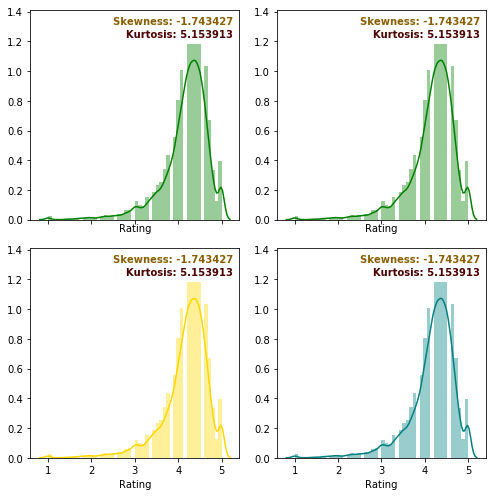

In [382]:
f, axes = plt.subplots(2,2, figsize=(7, 7), sharex=True)
sns.distplot(df['Rating'], color="green", ax=axes[0,0])
sns.distplot(df['Rating'], color="green", ax=axes[0,1])
sns.distplot(df['Rating'], color="gold", ax=axes[1,0])
sns.distplot(df['Rating'], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['Rating'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['Rating'].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()
#here we plot different histogram plots using sea born and also measure skewness and kurtosis for each

__Here we observe that skewness is below -1. so, this is highly negative skewed data.
  Here data is skewed a towards higher values(Ratings).__

#### b. What is the implication of this on your analysis?

__I see that data is highly negative skewed and is more towards higher values of ratings. But most of the data is concentrated between 3 to 5. There is a heavy/long tail on to the side of lower values less than 3. So, it is observable that significant amount of data lies above "3" rating which is indicating good ratings overall.__

### 6. What are the top Content Rating values?

In [383]:
df.groupby('Content Rating').count() 
# Here we groupby values with respect to Content Rating and count all the values in that category.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


__"Everyone" is a top 'Content Rating' value followed by "Teen".__

#### a. Are there any values with very few records?

Yes, there are two values __"Unrated" and "Adults only 18+"__ with lesser records.

#### b. If yes, drop those as they won’t help in the analysis

In [384]:
df.drop(df[df['Content Rating'] == "Unrated"].index, inplace = True)
df.drop(df[df['Content Rating'] == "Adults only 18+"].index, inplace = True)
# Here we drop those records with lesser values.

In [385]:
df['Content Rating'].unique() # we check for surety

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+'], dtype=object)

### 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

C:\Users\kabad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


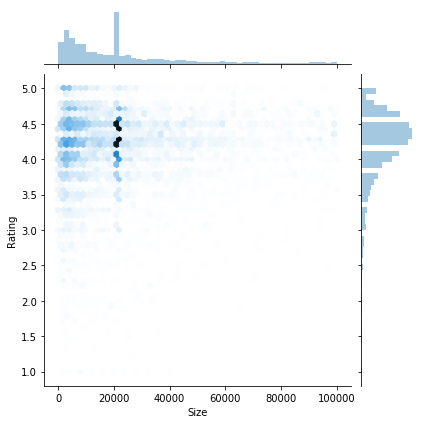

In [386]:
x = df['Size']
y = df['Rating']
sns.jointplot(x,y,kind="hex")

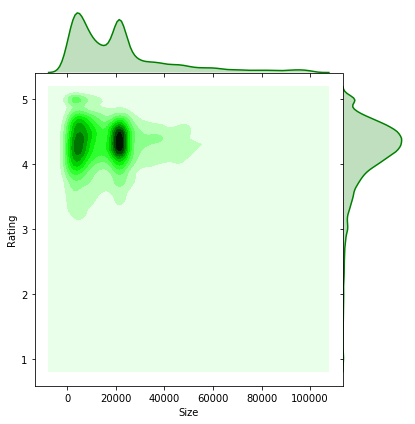

In [387]:
sns.jointplot(x,y,kind="kde", space=0, color="g")

#### b. Do you see any patterns?

__Yes, it shows that concentration is more in between 3 to 5 in Rating and between 0 to 40000 in size__

#### c. How do you explain the pattern?

__This pattern tells us that when size is less there are more ratings in good range i.e 3 to 5. Whereas when the size increases ratings are also decreasing or we can se density of ratings is decreased. This can happen as not many apps on playstore are that big in size except a few heavy apps like high end gamings or editings apps and similar types. So, we can see that playstore has more apps in a particular size range and hence ratings concentration is also high in that region.__

### 8. Effect of price on rating

#### a. Make a jointplot (with regression line)

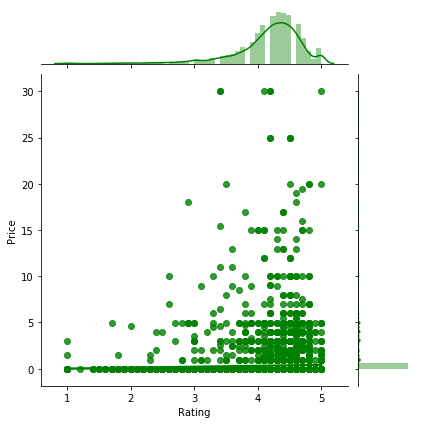

In [388]:
x = df['Rating']
y = df['Price']
sns.jointplot(x,y,kind="reg", color="g")

#### b. What pattern do you see?

__Concentration of Price is more in 0 to 5. There is lot of data with price "0" i.e. free apps, therefore, regression line is passing from close to "0".__

#### c. How do you explain the pattern?

__Apps between price range of 0 to 5 have more number of rating between 3 to 5 but also has some bad reviews below 3.__

#### d. Replot the data, this time with only records with price > 0

In [389]:
df1 = df.drop(df[df['Price'] < 1].index) 

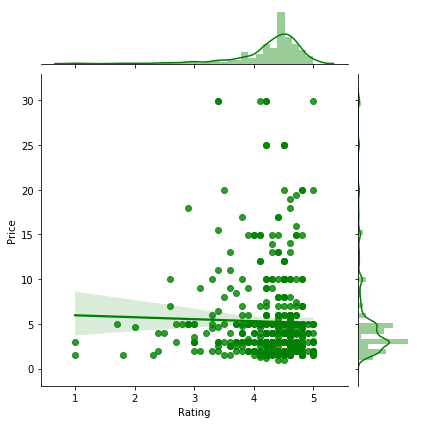

In [390]:
x = df1['Rating']
y = df1['Price']
sns.jointplot(x,y,kind="reg", color="g")

In [391]:
df.shape

(8431, 13)

#### e. Does the pattern change?

__No, There is not any chnge in pattern. Free apps i.e. cost 0 apps had all types of ratings.Here, without free apps, Ratings less than 3 are less in number and more than 3 are more in number.__
  

#### f. What is your overall inference on the effect of price on the rating

__Here we can clearly observe that when the price of an app is higher it is always a good app as it shows that higher priced apps have all the good ratings between 3 to 5 and almost negligiable bad ratings. Whereas, low price apps have mixed ratings__

### 9. Look at all the numeric interactions together –

#### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

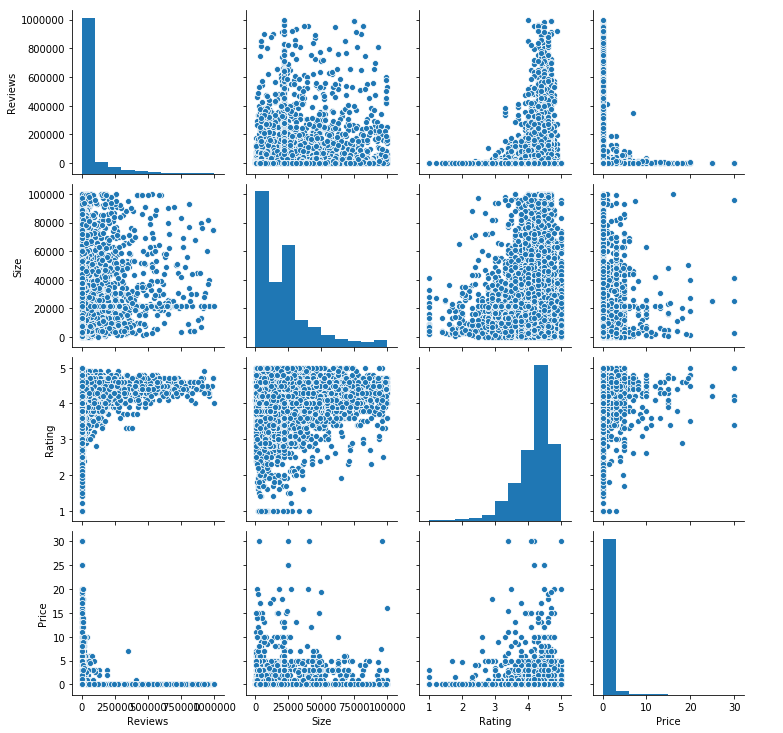

In [392]:
sns.pairplot(df,vars=["Reviews","Size","Rating","Price"])

### 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating

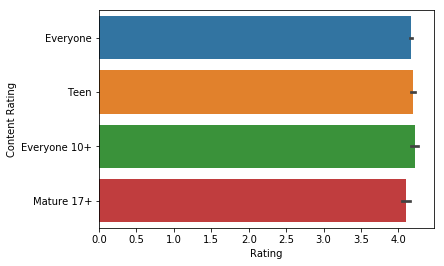

In [393]:
x = df['Rating']
y = df['Content Rating']
sns.barplot(x, y)
# plotting barplot using Rating and Content Rating columns

#### b. Which metric would you use? Mean? Median? Some other quantile?

__I will use mean in this case as it will give average by considering all the ratings. If we use median and quantile then it will not give justice it as each and every rating is important and should be considered.__

#### c. Choose the right metric and plot

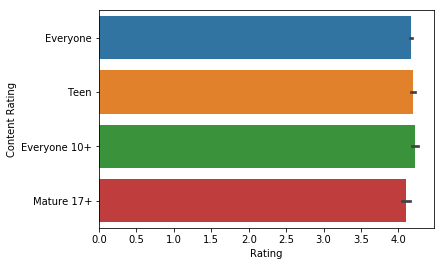

In [394]:
x = df['Rating']
y = df['Content Rating']
sns.barplot(x, y, estimator=np.mean)

### 11. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

In [395]:
 #b = np.array_split(df['Size'], 5)

In [396]:
df['Bucket'] = pd.qcut(df['Size'], q=5)
df['Bucket'].value_counts()

(12000.0, 21516.53]    2310
(4600.0, 12000.0]      1789
(8.499, 4600.0]        1713
(32000.0, 100000.0]    1682
(21516.53, 32000.0]     937
Name: Bucket, dtype: int64

#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [397]:
a=df['Rating'].quantile(0.2)
a

3.9

In [398]:
b=df['Size'].quantile(0.2)
b

4600.0

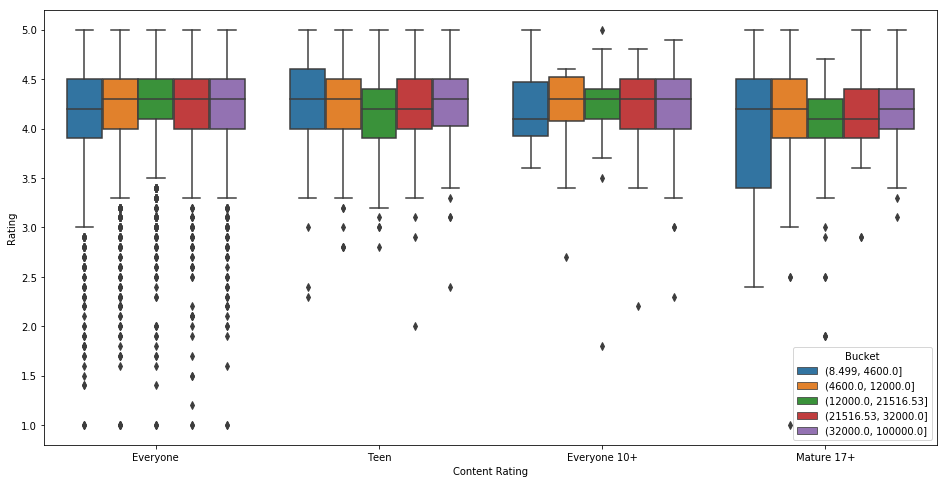

In [399]:
##Refrence/Credits - Tushar Dalal
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['Content Rating'],y=df['Rating'],hue=df['Bucket']);  

### c. Make a heatmap of this

__i. Annotated
ii. Greens color map__

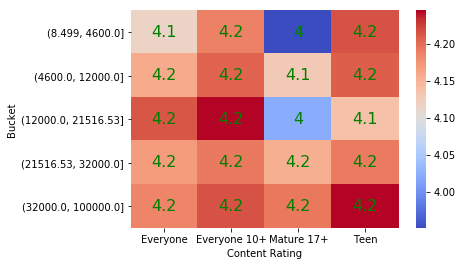

In [400]:
map=df.pivot_table(columns="Content Rating",index="Bucket",values="Rating")
sns.heatmap(map,annot=True,cmap="coolwarm",annot_kws={"color":"green","size":16})

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

__All types of apps are preffered in all categories. All size of apps are preffered in all the categories.__

__There may be more number of apps in small sizes and and free or less cost but medium and heavy apps in terms of size and cost are also having good rating even though having very less user base.__